In [92]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, log_loss
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def get_model_summaries(predictions, actuals, labels, model_name):
    actuals = [labels[actual] for actual in np.argmax(actuals, axis = 1)]
    loss = log_loss(actuals, predictions)
    predictions = [labels[prediction] for prediction in np.argmax(predictions, axis = 1)]
    accuracy = accuracy_score(actuals, predictions)
    precision_weighted = precision_score(actuals, predictions, labels=labels, average='weighted')
    recall_weighted = recall_score(actuals, predictions, labels=labels, average='weighted')
    f1_weighted = f1_score(actuals, predictions, labels=labels, average='weighted')
    return [model_name, loss, accuracy, precision_weighted, recall_weighted, f1_weighted]

In [100]:
def model_evaluation(predictions, y, column_labels, label):
    y = [labels[actual] for actual in np.argmax(y, axis = 1)]
    #calculate loss
    loss = log_loss(y, predictions)
    print('{0} Loss: {1:.4f}'.format(label, loss))
    predictions = [labels[prediction] for prediction in np.argmax(predictions, axis = 1)]
    #calculate accuracy
    accuracy = accuracy_score(y, predictions)
    print('{0} Accuracy: {1:.4f}'.format(label, accuracy))
    #calculate precision
    precision_weighted = precision_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} Precision - Weighted: {1:.4f}'.format(label, precision_weighted))
    #calculate recall
    recall_weighted = recall_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} Recall - Weighted: {1:.4f}'.format(label, recall_weighted))
    #calculate f1
    f1_weighted = f1_score(y, predictions, labels=column_labels, average='weighted')
    print('{0} F1 - Weighted: {1:.4f}'.format(label, f1_weighted))    
    cm = confusion_matrix(y, predictions)
    cm = cm.astype('float') / cm.sum(axis=1)
    df_cm = pd.DataFrame(cm, index = column_labels, columns = column_labels)
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, fmt='.3f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [108]:
def plot_roc(model_list, model_names, actual, labels):
    roc_auc = dict()
    fpr = dict()
    tpr = dict()
    for i, predictions in enumerate(model_list):
        fpr["micro - " + model_names[i]], tpr["micro - " + model_names[i]], _ = roc_curve(actual.ravel(), predictions.ravel())
        roc_auc["micro - " + model_names[i]] = auc(fpr["micro - " + model_names[i]], tpr["micro - " + model_names[i]])
    plt.figure(figsize=(10,10))
    colors = 'bgr'
    for i, color in zip(fpr.keys(), colors):
        plt.plot(fpr[i], tpr[i], color=color, linestyle=':',
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves by Genre')
    plt.legend(loc="lower right")
    plt.show()

In [75]:
labels = pd.read_csv('train_w_poster_updated_genres.csv')['genre']
labels = sorted(labels.unique())
y_train = np.load('train_outcome_keras.npy')
y_test = np.load('test_outcome_keras.npy')

In [76]:
predictions = os.listdir('predictions/')
predictions = [prediction for prediction in predictions if np.load('predictions/' + prediction).shape[1]==8]

In [80]:
train_predictions = [prediction for prediction in predictions if 'test' not in prediction]
test_predictions = [prediction for prediction in predictions if 'test' in prediction]

In [94]:
train_scores = []
for prediction in train_predictions:
    prediction_matrix = np.load('predictions/' + prediction)
    train_scores.append(get_model_summaries(prediction_matrix, y_train, labels, prediction))
train_summary_df = pd.DataFrame(train_scores, columns  = ['model_name', 'loss', 'accuracy', 'precision', 'recall', 'f1'])

In [96]:
test_scores = []
for prediction in test_predictions:
    prediction_matrix = np.load('predictions/' + prediction)
    test_scores.append(get_model_summaries(prediction_matrix, y_test, labels, prediction))
test_summary_df = pd.DataFrame(test_scores, columns  = ['model_name', 'loss', 'accuracy', 'precision', 'recall', 'f1'])

In [97]:
train_summary_df

,model_name,loss,accuracy,precision,recall,f1
0,model_47_combined_train_predictions.npy,1.142122,0.564410,0.558174,0.564410,0.554444
1,model_48_train_predictions.npy,1.663048,0.345148,0.414806,0.345148,0.198251
2,model_49_image_train_predictions.npy,22.989266,0.334393,0.111818,0.334393,0.167594
3,model_50_image_train_predictions.npy,1.853908,0.334393,0.111818,0.334393,0.167594
4,model_51_metadata_train_predictions.npy,1.155935,0.560865,0.556345,0.560865,0.550554
5,model_52_combined_train_predictions.npy,1.179994,0.551088,0.545236,0.551088,0.538013
6,model_52_image_train_predictions.npy,1.853886,0.334393,0.111818,0.334393,0.167594
7,model_53_image_train_predictions.npy,1.757863,0.332193,0.145770,0.332193,0.177453
8,model_53_pretrained_train_predictions.npy,22.989266,0.334393,0.111818,0.334393,0.167594
9,model_54_image_train_predictions.npy,30.701604,0.111098,0.012343,0.111098,0.022217


In [98]:
test_summary_df

,model_name,loss,accuracy,precision,recall,f1
0,model_47_combined_test_predictions.npy,1.503333,0.451788,0.447104,0.451788,0.443845
1,model_48_test_predictions.npy,1.802223,0.341917,0.200591,0.341917,0.185148
2,model_49_image_test_predictions.npy,22.610793,0.345351,0.119267,0.345351,0.177302
3,model_50_image_test_predictions.npy,1.841366,0.345351,0.119267,0.345351,0.177302
4,model_51_metadata_test_predictions.npy,1.524408,0.444349,0.440032,0.444349,0.434043
5,model_52_combined_test_predictions.npy,1.492047,0.456938,0.445560,0.456938,0.442526
6,model_52_image_test_predictions.npy,1.841282,0.345351,0.119267,0.345351,0.177302
7,model_53_image_test_predictions.npy,1.796107,0.344492,0.154776,0.344492,0.189674
8,model_53_pretrained_test_predictions.npy,22.610793,0.345351,0.119267,0.345351,0.177302
9,model_54_image_test_predictions.npy,30.837565,0.107010,0.011451,0.107010,0.020688


In [102]:
chosen_models = ['model_52_combined_', 'model_56_image_', 'model_54_pretrained_']

### Confusion matrices for train and test of chosen models

model_52_combined_train Loss: 1.1800
model_52_combined_train Accuracy: 0.5511
model_52_combined_train Precision - Weighted: 0.5452
model_52_combined_train Recall - Weighted: 0.5511
model_52_combined_train F1 - Weighted: 0.5380


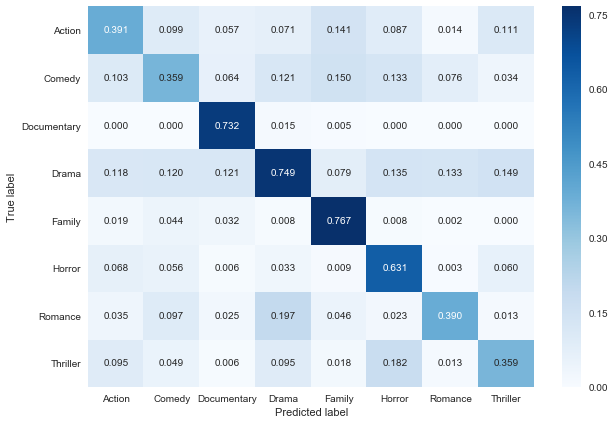

model_52_combined_test Loss: 1.4920
model_52_combined_test Accuracy: 0.4569
model_52_combined_test Precision - Weighted: 0.4456
model_52_combined_test Recall - Weighted: 0.4569
model_52_combined_test F1 - Weighted: 0.4425


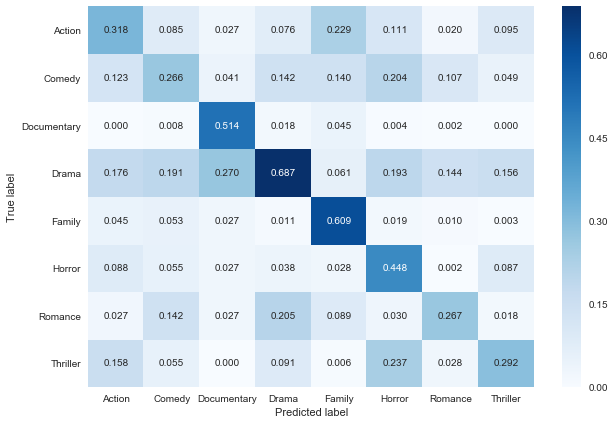

model_56_image_train Loss: 1.8538
model_56_image_train Accuracy: 0.3344
model_56_image_train Precision - Weighted: 0.1118
model_56_image_train Recall - Weighted: 0.3344
model_56_image_train F1 - Weighted: 0.1676


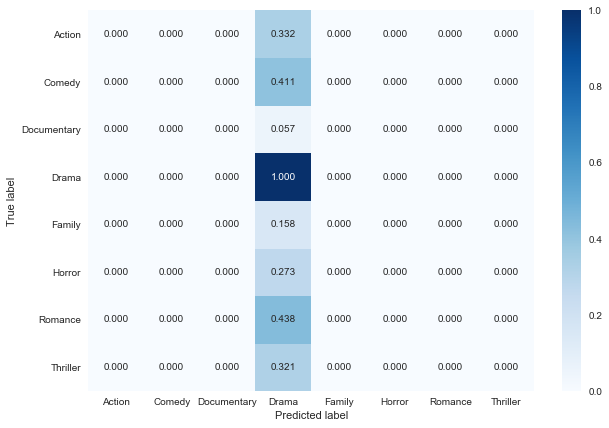

model_56_image_test Loss: 1.8412
model_56_image_test Accuracy: 0.3454
model_56_image_test Precision - Weighted: 0.1193
model_56_image_test Recall - Weighted: 0.3454
model_56_image_test F1 - Weighted: 0.1773


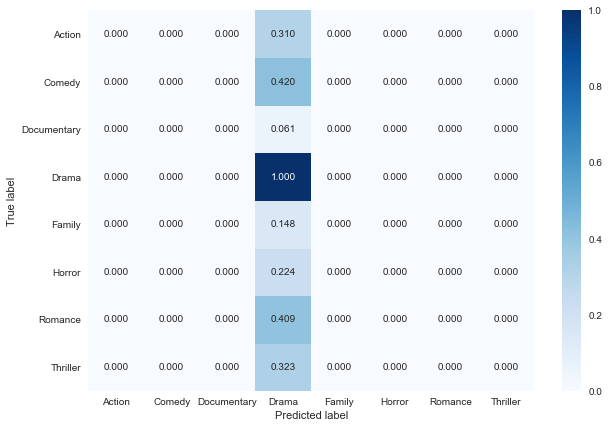

model_54_pretrained_train Loss: 22.9893
model_54_pretrained_train Accuracy: 0.3344
model_54_pretrained_train Precision - Weighted: 0.1118
model_54_pretrained_train Recall - Weighted: 0.3344
model_54_pretrained_train F1 - Weighted: 0.1676


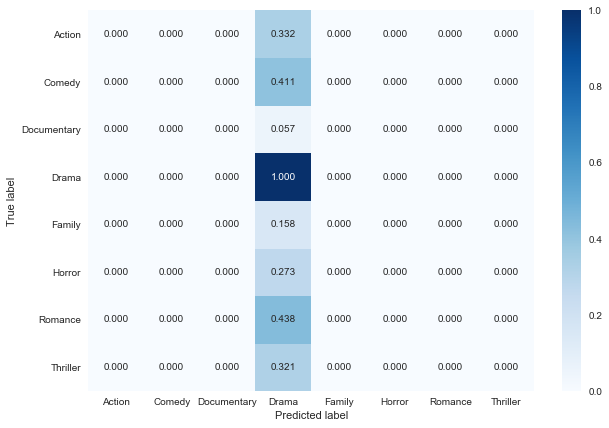

model_54_pretrained_test Loss: 22.6108
model_54_pretrained_test Accuracy: 0.3454
model_54_pretrained_test Precision - Weighted: 0.1193
model_54_pretrained_test Recall - Weighted: 0.3454
model_54_pretrained_test F1 - Weighted: 0.1773


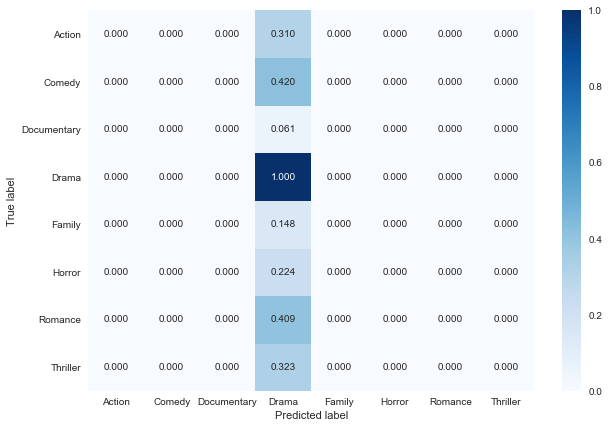

In [107]:
for model in chosen_models:
    for t in ['train', 'test']:
        y = y_train if t == 'train' else y_test
        model_evaluation(np.load('predictions/' + model + t + '_predictions.npy'),
                         y, labels, model + t)

### Comparison of combined vs. image vs. pre-trained

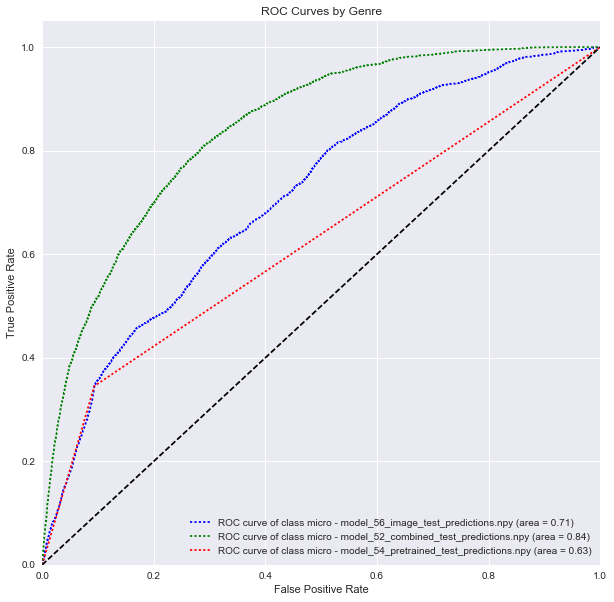

In [109]:
chosen_model_names = ['model_52_combined_test_predictions.npy', 'model_56_image_test_predictions.npy', 'model_54_pretrained_test_predictions.npy']
chosen_model_predictions = [np.load('predictions/' + model) for model in chosen_model_names]
plot_roc(chosen_model_predictions, chosen_model_names, y_test, labels)

### Combined models that were run, shows that metadata drives all accuracy

In [115]:
rf_xgboost = pd.read_csv('../../Milestone 3/Random ForestXGBoost_probabilities.csv')
rf_xgboost.columns

Index([u'Unnamed: 0', u'Action', u'Comedy', u'Documentary', u'Drama',
       u'Family', u'Horror', u'Romance', u'Thriller'],
      dtype='object')

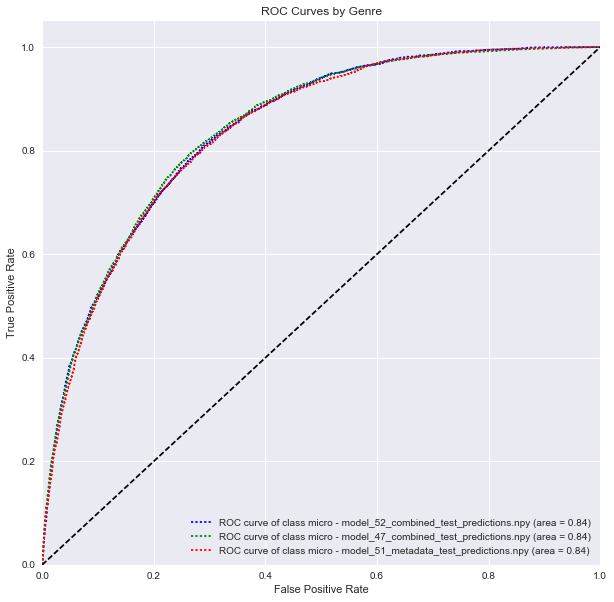

In [112]:
chosen_model_names = ['model_52_combined_test_predictions.npy', 'model_47_combined_test_predictions.npy', 'model_51_metadata_test_predictions.npy']
chosen_model_predictions = [np.load('predictions/' + model) for model in chosen_model_names]
plot_roc(chosen_model_predictions, chosen_model_names, y_test, labels)